**Exercise 2.03:**

 Examining a Possible Log-Linear Relationship Using Python

In this exercise, Logarithm function will be used to transforma variables in order to see if the transformed variable gives the best fit:

In [ ]:
#importing modules
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LOADING MIAMI_HOUSING DATASET AND DISPLAYING FIRST 5 ENTRIES

In [ ]:
miami_data = pd.read_csv\
('https://raw.githubusercontent.com/fenago/DSBook/main/miami-housing.csv')
miami_data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


Check for missing values (null values) in the DataFrame

In [ ]:
raw_data = miami_data.dropna()

In [ ]:
#List the column names of the DataFrame
list(raw_data.columns)

['LATITUDE',
 'LONGITUDE',
 'PARCELNO',
 'SALE_PRC',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'SPEC_FEAT_VAL',
 'RAIL_DIST',
 'OCEAN_DIST',
 'WATER_DIST',
 'CNTR_DIST',
 'SUBCNTR_DI',
 'HWY_DIST',
 'age',
 'avno60plus',
 'month_sold',
 'structure_quality']

Renaming the DataFrame columns from 1 to 5, others are kept same

In [ ]:

#----Write your code here----#



#-------Solution:---------#
#renamedMiamiData = raw_data.rename\
#(columns = {\
#'LATITUDE':'LATITUDE',\
#' LONGITUDE ':'LONGITUDE',\
#'PARCELNO ':'Parcel Number',\
#'SALE_PRC':'SalePrice',\
#'LND_SQFOOT':'LandLength'})
#renamedMiamiData.head()

,LATITUDE,LONGITUDE,PARCELNO,SalePrice,LandLength,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
#Inspecting the data types of the columns
renamedMiamiData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SalePrice          13932 non-null  float64
 4   LandLength         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

Calculate basic statistics for the numeric columns in the DataFrame:

In [ ]:
renamedMiamiData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
LATITUDE,13932.0,2.572881e+01,1.406333e-01,2.543433e+01,2.562006e+01,2.573181e+01,2.585227e+01,2.597438e+01
LONGITUDE,13932.0,-8.032748e+01,8.919907e-02,-8.054217e+01,-8.040328e+01,-8.033891e+01,-8.025802e+01,-8.011975e+01
PARCELNO,13932.0,2.356496e+12,1.199290e+12,1.020008e+11,1.079160e+12,3.040300e+12,3.060170e+12,3.660170e+12
SalePrice,13932.0,3.999419e+05,3.172147e+05,7.200000e+04,2.350000e+05,3.100000e+05,4.280000e+05,2.650000e+06
LandLength,13932.0,8.620880e+03,6.070089e+03,1.248000e+03,5.400000e+03,7.500000e+03,9.126250e+03,5.706400e+04
TOT_LVG_AREA,13932.0,2.058045e+03,8.135385e+02,8.540000e+02,1.470000e+03,1.877500e+03,2.471000e+03,6.287000e+03
SPEC_FEAT_VAL,13932.0,9.562493e+03,1.389097e+04,0.000000e+00,8.100000e+02,2.765500e+03,1.235225e+04,1.750200e+05
RAIL_DIST,13932.0,8.348549e+03,6.178027e+03,1.050000e+01,3.299450e+03,7.106300e+03,1.210260e+04,2.962150e+04
OCEAN_DIST,13932.0,3.169099e+04,1.759508e+04,2.361000e+02,1.807935e+04,2.854175e+04,4.431065e+04,7.574490e+04
WATER_DIST,13932.0,1.196029e+04,1.193299e+04,0.000000e+00,2.675850e+03,6.922600e+03,1.920000e+04,5.039980e+04


Dividing the DataFrame into training and test sets

In [ ]:

X = renamedMiamiData.drop('SalePrice', axis = 1)
y = renamedMiamiData[['SalePrice']]
seed = 10
test_data_size = 0.3
#----Write your code here----#



#-------Solution:---------#
#X_train, X_test, \
#y_train, y_test = train_test_split(X, y, \
#test_size = test_data_size, \
#random_state = seed)
#train_data = pd.concat([X_train, y_train], axis = 1)
#test_data = pd.concat([X_test, y_test], axis = 1)

Using the seaborn "regplot" function to create the scatter plot. Confidence interval (ci) is kept 95%.
X and Y labels, the fontsize and name labels, the x and y limits, and the tick parameters of the matplotlib graph object(ax) are also set in this same cell:

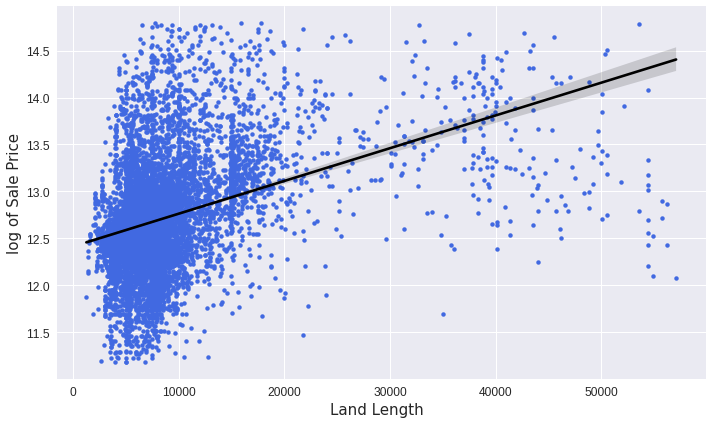

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['SalePrice'])
sns.regplot(x='LandLength', y=y, ci=95, \
            data=train_data, ax=ax, color='k', \
            scatter_kws={"s": 20,"color": "royalblue", \
            "alpha":1})

#----Write your code here----#



#-------Solution:---------#
#ax.set_ylabel('log of Sale Price', \
#              fontsize=15, fontname='DejaVu Sans')
#ax.set_xlabel("Land Length "\
#              " ", fontsize=15, \
#              fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
